<a href="https://colab.research.google.com/github/LuFernandez/imagaynes/blob/master/Morfologia/Morfologia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from IPython.display import clear_output

In [2]:
!wget 'https://raw.githubusercontent.com/LuFernandez/imagaynes/master/Morfologia/Imagenes/Ej1.PNG'
!wget 'https://raw.githubusercontent.com/LuFernandez/imagaynes/master/Morfologia/Imagenes/cuadrados.PNG'
!wget 'https://raw.githubusercontent.com/LuFernandez/imagaynes/master/Morfologia/Imagenes/Ej3.PNG'
!wget 'https://raw.githubusercontent.com/LuFernandez/imagaynes/master/Morfologia/Imagenes/Ej4.PNG'
!wget 'https://raw.githubusercontent.com/LuFernandez/imagaynes/master/Morfologia/Imagenes/TopHat.PNG'
!wget 'https://raw.githubusercontent.com/LuFernandez/imagaynes/master/Morfologia/Imagenes/HitOrMiss.png'
!wget 'https://raw.githubusercontent.com/LuFernandez/imagaynes/master/Morfologia/Imagenes/thinning.PNG'
clear_output()

##1. Dilación

###Mostramos la imagen original

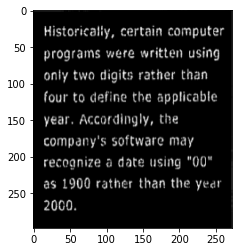

In [3]:
img1 = cv2.imread('Ej1.PNG')
plt.imshow(img1)

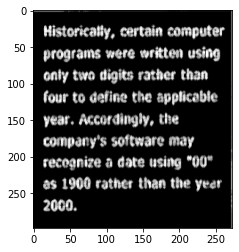

In [4]:
B = np.array([[0, 1, 0],
     [1, 1, 1],
     [0, 1, 0]], np.uint8)

dilation = cv2.dilate(img1, B, iterations = 1)

plt.imshow(dilation)      

## Ejercicio2

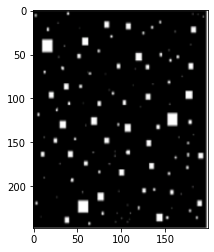

In [5]:
img = cv2.imread('cuadrados.PNG')
plt.imshow(img)

In [6]:
def MakeSubplot(img,fig,row,column,index,title):
  fig.add_subplot(row,column,index)
  plt.title(title)
  plt.axis('off')
  plt.imshow(img,cmap='gray', vmin=0)

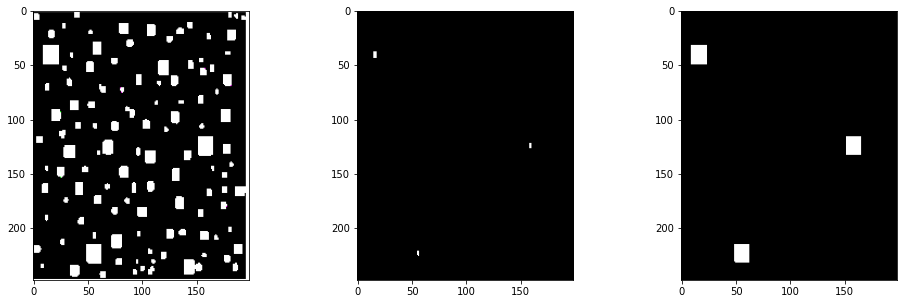

In [7]:
img[img>0] = 255
kernel = np.ones((13,13),np.uint16)
eroded = cv2.erode(img,kernel,iterations = 1)

dilated = cv2.dilate(eroded,kernel,iterations = 1)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=False, figsize =(12,12))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.5, wspace = 0.5)

ax1.imshow(img)

ax2.imshow(eroded)

ax3.imshow(dilated)

plt.show()

## Ejercicio 3 - Operador apertura

In [8]:
def CircularKernel(radius, kernel_size = 50):
  kernel = np.zeros( shape = (kernel_size,kernel_size), dtype=np.uint8)
  center = kernel_size//2
  for i in range(0, kernel_size):
        for j in range(0, kernel_size):
            if ((center - i) ** 2 + (center - j) ** 2) <= radius**2:
                  kernel[i,j] = 1
  return kernel.astype(np.uint8)


In [9]:
def ApplyOpening(kernel, img):
  eroded = cv2.erode(img,kernel,iterations = 1)
  return cv2.dilate(eroded,kernel,iterations = 1)

def ApplyClosing(kernel, img):
  dilated = cv2.dilate(img,kernel,iterations = 1)
  return cv2.erode(dilated,kernel,iterations = 1)

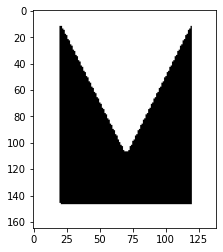

In [10]:
img3 = cv2.imread('Ej3.PNG')
#Binarizo la imagen
img3[img3 > 100] = 255
img3[img3 < 100] = 0

plt.imshow(img3)

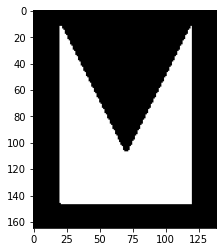

In [11]:
img3_inv = 255 - img3
plt.imshow(img3_inv)

Radio a utilizar para la apertura:

In [12]:
radio = 8
kernel = CircularKernel(radio)

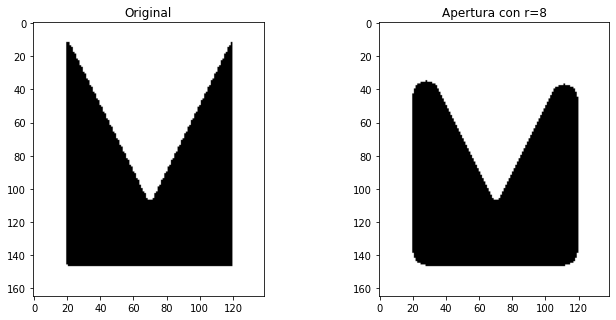

In [13]:
#Armo el elemento estructural
opened = ApplyOpening(kernel, img3_inv)
opened_inv = 255 - opened
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=False, figsize =(8,8))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.5, wspace = 0.5)

ax1.set_title("Original")
ax1.imshow(img3)

ax2.set_title("Apertura con r="+str(radio))
ax2.imshow(opened_inv.astype(int))

plt.show()

## Ejercicio 4 - Extraer contorno

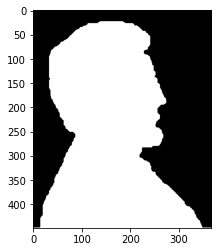

In [14]:
img4 = cv2.imread('Ej4.PNG')
#Binarizo la imagen
img4[img4 > 100] = 255
img4[img4 < 100] = 0
plt.imshow(img4)

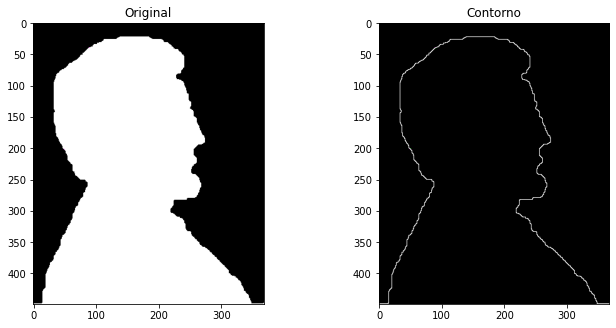

In [15]:
kernel = np.ones(shape=(3,3))
#Erosiono la imagen
eroded = cv2.erode(img4,kernel,iterations = 1)
#Obtengo el borde haciendo la resta
contour = img4 - eroded

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=False, figsize =(8,8))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.5, wspace = 0.5)

ax1.set_title("Original")
ax1.imshow(img4)

ax2.set_title("Contorno")
ax2.imshow(contour.astype(int))

plt.show()

## Ejercicio 5 - Investigar que es (y dar ejemplos) de:

### a) Thinning

El operador Thinning se define como:
$$S \odot T =S - S \circledast T$$
Donde $\circledast$ es el operador Hit and Miss, S es la imagen y T es un par estructural ( T=(E,F) ).

#### Ejemplo:

![alt text](https://raw.githubusercontent.com/LuFernandez/imagaynes/master/Morfologia/Imagenes/thinning.PNG)

### b) Thickening 
El operador de Thickening se define como:
$$ thicken\{I,J\} = I \cup (I\circledast J)$$
Donde $\circledast$ es el operador Hit and Miss, I es la imagen y J es un par estructural formado por dos kernels disjuntos.

Como alude su nombre, la operacion de thickening expande los pixels prendidos en una imagen como la dilacion. Esto puede verse ya que el resultado final seran los pixels que estaban originalmente prendidos mas los que se activen por el hit and miss. El operador de thickening es el operador dual de thinning, por lo que hacer el thinning del complemento de una imagen es equivalente a hacer el thickening de la imagen original.

#### Ejemplo:
![alt text](https://raw.githubusercontent.com/LuFernandez/imagaynes/master/Morfologia/Imagenes/Thickening.PNG)

### c) Top-hat transform

La Top-hat tranform se define como:
$$ f \hat{\circ}g = f - (f\circ g)$$
Lo que significa que equivale a restarle a una imagen (f) su apertura (realizada con el elemento estructural g).
Suele utilizars para resaltar picos angostos de intensidad y a la vez ignorar burbujas de iluminacion extensas.
A continuacion se muestra un ejemplo de implementacion:

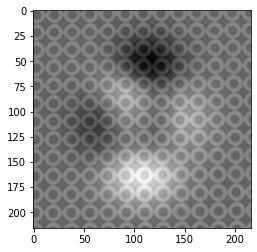

In [16]:
rings_img = cv2.imread('TopHat.PNG')
#rings_img[rings_img < 100 ] = 0
#rings_img[rings_img > 0 ] = 0
plt.imshow(rings_img)

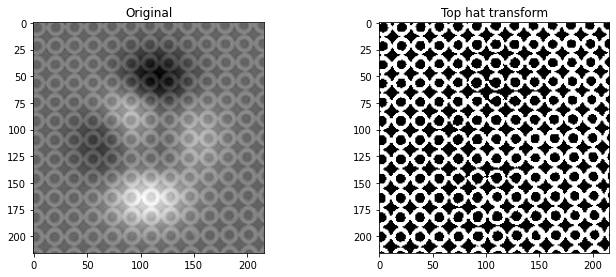

In [17]:
radio = 6
kernel = CircularKernel(radio)
#Armo el elemento estructural
opened = ApplyOpening(kernel, rings_img)
top_hat = rings_img - opened
top_hat[top_hat < 20 ] = 0
top_hat[top_hat > 20 ] = 255
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=False, figsize =(8,8))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.5, wspace = 0.5)

ax1.set_title("Original")
ax1.imshow(rings_img)

ax2.set_title("Top hat transform")
ax2.imshow(top_hat.astype(int))

plt.show()

### d) Hit and Miss


La transformada Hit and Miss se define como:
$$ A \circledast T = (A \ominus E) \cap (A^{C} \ominus F) $$
La transformada utiliza dos elementos estructurales E y F. El elemento T se define como el para formado por E y F, entonces:
$$ T=( E,F ) $$
La idea detras de la transformada es que funciona como una especie de extension de la erosion. Ademas de ver en que puntos de la imagen entra el elemento estructural E, tambien se pide que en dicho punto el elemnto estructural F no entre (que es lo mismo que decir que entre en el complemento).
Para que se cumplan ambas condiciones E y F siempre deben ser disjuntos.

#### Ejemplo de reconocimiento de objetos usando hit or miss:

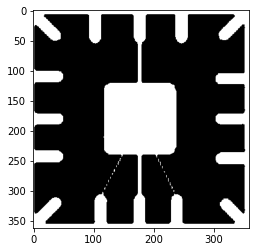

In [18]:
hit_img = cv2.imread('HitOrMiss.png', cv2.CV_8UC1)
treshold = 220
hit_img[ hit_img < treshold  ] = 0
hit_img[ hit_img >= treshold  ] = 255
plt.imshow(hit_img, cmap = "gray")

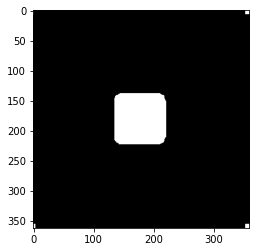

In [19]:
size = (35,35)
kernel = np.ones(size, dtype = int)
output_image = cv2.morphologyEx(hit_img, cv2.MORPH_HITMISS, kernel)

plt.imshow(output_image, cmap = "gray")